# Instalar bibliotecas

In [1]:
!pip install seaborn
!pip install pandas
!pip install pycaret --ignore-installed llvmlite
!pip install tqdm
!pip install scikit-learn==0.23.2
!pip install numpy==1.20
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 26.5 MB/s 
     |████████████████████████████████| 34.5 MB 12 kB/s 
     |████████████████████████████████| 11.2 MB 33.8 MB/s 
     |████████████████████████████████| 15.2 MB 17.4 MB/s 
     |████████████████████████████████| 17.8 MB 410 kB/s 
     |████████████████████████████████| 1.5 MB 36.9 MB/s 
     |████████████████████████████████| 1.7 MB 42.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 32.8 MB/s 
     |████████████████████████████████| 2.0 MB 59.7 MB/s 
     |████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
pycaret 2.3.10 requires imbalanced-learn==0.7.0, but you have imbalanced-learn 0.8.1 which is incompatible.
pycaret 2.3.10 requires spacy<2.4.0, but you have spacy 3.3.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 24.3 MB/s 


# Carregar base de dados

In [1]:
from sklearn import datasets as ds

import pandas as pd

def get_databese_of_the_exam():
    df = ds.fetch_openml(data_id=151,as_frame=True, return_X_y=True)
    df = pd.concat(df, axis=1).assign(target=lambda x: (x['class']=='UP')*1)
    df=df.drop(['class'], axis = 1)
    return df

df= get_databese_of_the_exam()

 # Análise exploratoria

In [53]:
import seaborn as sns

 ## Distribuição das classes de predição

<AxesSubplot:xlabel='target', ylabel='Count'>

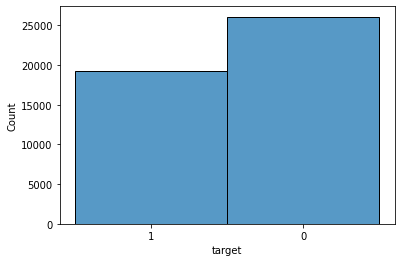

In [54]:
import seaborn as sns
df_plot_class=df.copy()
df_plot_class['target']=df['target'].apply(lambda x: str(x))
sns.histplot(data=df_plot_class, x="target")

 ### Conclusão
 Existe um relativo balanceamento entre as classes portanto, não vale apena usar over-sampling.

 ## Distribuição das atributos utilizados para fazer a predição das classes

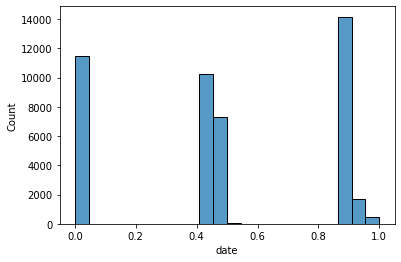

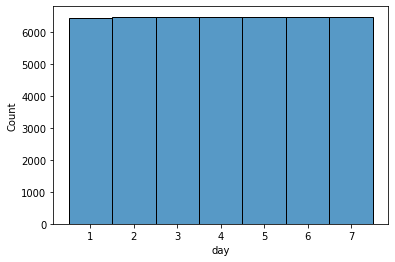

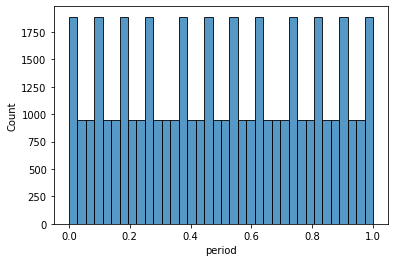

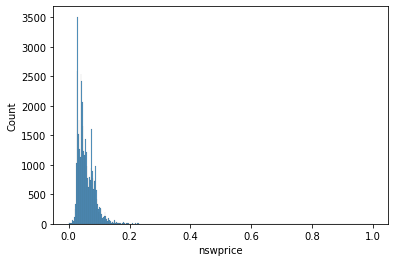

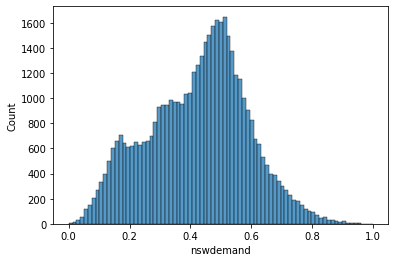

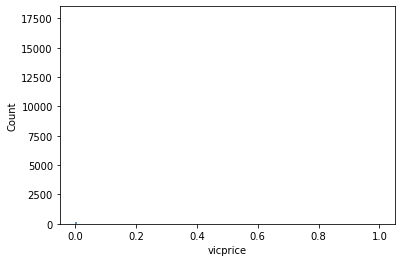

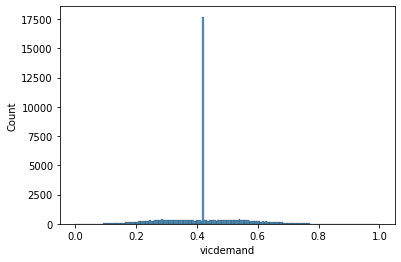

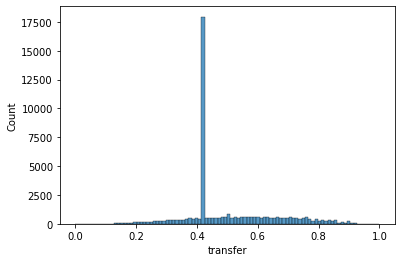

In [55]:
from matplotlib import pyplot as plt
for i,col in enumerate(df.columns):
    if(col !='target'):
        plt.figure(i)
        sns.histplot(data=df,x=col)

 ### Conclusões
 #### Para o atributo Date
 Com base no histograma é possível afirmar que existe sazonalidade na base de dados.
 #### Para o atributo day
 A distribuição deste atributo é uniforme
 #### Para o atributo period
 A distribuição é quase uniforme, tendo intervalos de valores onde a distribuição aprensenta picos
 #### Para o atributo rawprice
 A distribuição é quase uniforme, tendo intervalos de valores onde a distribuição aprensenta picos
 #### Para o atributo nswprice
 A distribuição esta entre uma normal é uma exponencial, este atributo possui muitos outliers (pontos fora da curva).
 #### Para o atributo nswdemand
 A distribuição esta muito perto de uma normal.
 #### Para o atributo vicprice, vicdemand e transfers
 As distribuições mostram que estes atributos tem basicamente um unico valor.

 # Análise para os algoritmos que criam modelos predição e análise das técnicas de pré-processamento da base
 ## Comparação entre os algoritmos de classificação

In [4]:
import pycaret
from pycaret.classification import *

 ### Comparação das técnicas de pré-processamento

 #### Criação classificadores a partir de dados de entrada crus (sem pré-processamento)
 Tabela comparando os diferentes algoritmos de classificação:

In [4]:
clf1 = setup(data = df, target = 'target',silent=True)
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9111,0.9707,0.8896,0.9000,0.8947,0.8178,0.8179,36.3410
rf,Random Forest Classifier,0.9005,0.9653,0.8618,0.8998,0.8803,0.7952,0.7959,0.5080
et,Extra Trees Classifier,0.8880,0.9581,0.8402,0.8901,0.8643,0.7691,0.7701,0.3780
lightgbm,Light Gradient Boosting Machine,0.8771,0.9511,0.8462,0.8621,0.8540,0.7480,0.7481,0.0660
dt,Decision Tree Classifier,0.8724,0.8691,0.8472,0.8517,0.8494,0.7388,0.7389,0.0450
gbc,Gradient Boosting Classifier,0.8329,0.9112,0.7712,0.8242,0.7967,0.6551,0.6563,0.6250
ada,Ada Boost Classifier,0.8117,0.8876,0.7203,0.8149,0.7646,0.6087,0.6120,0.1610
knn,K Neighbors Classifier,0.7931,0.8650,0.7278,0.7720,0.7492,0.5734,0.5742,0.3240
lr,Logistic Regression,0.7529,0.8210,0.5981,0.7687,0.6727,0.4792,0.4889,0.3980
svm,SVM - Linear Kernel,0.7493,0.0000,0.5447,0.8051,0.6468,0.4642,0.4871,0.0350


 #### Criação classificadores a partir de  dados  de entrada normalizados por z-score
 Tabela comparando os diferentes algoritmos de classificação

In [5]:
clf1 = setup(data = df, target = 'target',silent=True,normalize = True)
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9124,0.9713,0.8917,0.9012,0.8964,0.8206,0.8207,36.3030
rf,Random Forest Classifier,0.9007,0.9652,0.8605,0.9012,0.8804,0.7956,0.7962,0.5290
et,Extra Trees Classifier,0.8866,0.9567,0.8391,0.8878,0.8627,0.7663,0.7672,0.3700
lightgbm,Light Gradient Boosting Machine,0.8795,0.9526,0.8477,0.8659,0.8567,0.7527,0.7529,0.0790
dt,Decision Tree Classifier,0.8712,0.8684,0.8495,0.8477,0.8486,0.7366,0.7366,0.0450
gbc,Gradient Boosting Classifier,0.8334,0.9121,0.7706,0.8257,0.7971,0.6560,0.6573,0.6100
knn,K Neighbors Classifier,0.8250,0.8975,0.7743,0.8061,0.7899,0.6401,0.6405,0.2560
ada,Ada Boost Classifier,0.8083,0.8879,0.7159,0.8108,0.7604,0.6017,0.6050,0.1610
lr,Logistic Regression,0.7600,0.8266,0.6207,0.7700,0.6872,0.4962,0.5039,0.0220
svm,SVM - Linear Kernel,0.7593,0.0000,0.6077,0.7783,0.6819,0.4931,0.5034,0.0460


 #### Criação classificadores a partir de dados entrada transformados para distruibuição normal
 Tabela comparando os diferentes algoritmos de classificação

In [6]:
clf1 = setup(data = df, target = 'target',silent=True,transformation = True)
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9104,0.9700,0.8920,0.8970,0.8945,0.8166,0.8167,36.0510
rf,Random Forest Classifier,0.8999,0.9650,0.8638,0.8973,0.8802,0.7942,0.7947,0.5340
et,Extra Trees Classifier,0.8907,0.9593,0.8493,0.8892,0.8687,0.7752,0.7759,0.3440
lightgbm,Light Gradient Boosting Machine,0.8787,0.9523,0.8515,0.8621,0.8567,0.7516,0.7517,0.0710
dt,Decision Tree Classifier,0.8746,0.8715,0.8507,0.8542,0.8524,0.7433,0.7433,0.0540
knn,K Neighbors Classifier,0.8377,0.9089,0.7971,0.8174,0.8071,0.6671,0.6673,0.2490
gbc,Gradient Boosting Classifier,0.8326,0.9116,0.7695,0.8257,0.7965,0.6546,0.6559,0.6110
ada,Ada Boost Classifier,0.8121,0.8884,0.7263,0.8127,0.7669,0.6104,0.6132,0.1610
lr,Logistic Regression,0.7602,0.8301,0.6536,0.7509,0.6988,0.5012,0.5046,0.0350
ridge,Ridge Classifier,0.7594,0.0000,0.6376,0.7588,0.6928,0.4975,0.5027,0.0190


 ### Criação de classificadores utilizando apenas os atributos que possuem mais informação para separar as classes (feature selection)


In [5]:
clf1 = setup(data = df, target = 'target',silent=True,
            feature_selection = True,feature_selection_threshold=0.7,
             remove_multicollinearity = True, multicollinearity_threshold = 0.8)

df_feature_removed=get_config('X')


,Description,Value
0,session_id,1939
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(45312, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


 Atributos que não foram considerados importantes pelo algoritmo feature selection do pycaret:

In [6]:
for col in df_feature_removed.columns:
    if(not (col in df.columns)):
        print(col)

day_7
day_1
day_5
day_6
day_2


 Tabela comparando os diferentes algoritmos de classificação:

In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9106,0.9701,0.8901,0.8987,0.8944,0.8168,0.8168,35.6310
rf,Random Forest Classifier,0.9006,0.9650,0.8676,0.8955,0.8813,0.7958,0.7962,0.4800
et,Extra Trees Classifier,0.8861,0.9556,0.8464,0.8813,0.8634,0.7659,0.7664,0.3320
lightgbm,Light Gradient Boosting Machine,0.8775,0.9506,0.8455,0.8638,0.8545,0.7488,0.7489,0.0690
dt,Decision Tree Classifier,0.8732,0.8703,0.8507,0.8512,0.8509,0.7406,0.7407,0.0400
gbc,Gradient Boosting Classifier,0.8321,0.9099,0.7662,0.8266,0.7952,0.6533,0.6547,0.5670
ada,Ada Boost Classifier,0.8089,0.8858,0.7147,0.8135,0.7609,0.6029,0.6064,0.1460
knn,K Neighbors Classifier,0.7922,0.8638,0.7328,0.7682,0.7500,0.5724,0.5730,0.3910
lr,Logistic Regression,0.7512,0.8199,0.5956,0.7674,0.6706,0.4758,0.4857,0.0430
svm,SVM - Linear Kernel,0.7452,0.0000,0.5435,0.7978,0.6429,0.4563,0.4789,0.0320


 #### Conclusão sobre o uso de pré-processamento
 Nenhuma técnica de pré-processamento aumentou a qualidade dos modelos criados a partir dela

 #### Conclusão sobre os algoritmos de classificação
 Extreme Gradient Boosting é o melhor algoritmo de classificação para este problema.
 Ele apresenta as melhores métricas (Aucuracia, AUC, Recall e etc ) dentre todos os outros

# Descobrir os melhores parametros para *Extreme Gradient Boosting*

Melhores parâmetros encontrados Utilizando o GridSearchCV:

In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from functools import partial
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


params = {
        'n_estimators': [4, 20, 120,200],
        'max_depth': [2, 4, 8, 16],
        'max_leaves': [32, 128, 256,4096],
        'grow_policy': ['depthwise','lossguide'],
        'learning_rate':[0.01,0.001,0.0001]
        }
xgb = XGBClassifier()
clf = GridSearchCV(xgb, params,verbose=0,scoring='roc_auc',n_jobs=1)
df_x=df.drop(['target'], axis = 1)
df_x['day']=df_x['day'].apply(lambda x: float(x))
y=df['target']

clf.fit(df_x.values, y.values)
clf.best_params_



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

{'grow_policy': 'depthwise',
 'learning_rate': 0.01,
 'max_depth': 4,
 'max_leaves': 32,
 'n_estimators': 200}

## Criação de um modelo a partir dos parâmetros encontrados 

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

def positionWithMaxValueFromAVector(vector):
    valueToSearch=vector
    i=0
    for x in vector:
        if(x==valueToSearch):
            return i            
        i=i+1
        
    return -1

def create_confusion_matrix(real,predict):
    predictedClassFromModel=predict    
    yReal=real
    return pd.DataFrame(confusion_matrix(yReal,predictedClassFromModel),columns=[['predito','predito'],['Tipo 1','Tipo 2']], index=[['real','real'],['Tipo 1','Tipo 2']])

def find_better_cutoff_for_prob_prediction_of_model(model, x_train,y_train):
    target_prediction_proba=xgb.predict_proba(x_train)
    better_cutoff=-1
    f1=-1
    for i in range(1000):
        cutoff=float(i)/1000.0
        prediction=np.array(target_prediction_proba[:,1]>cutoff,dtype=int)    
        f1_temp=f1_score(y_train, prediction)
        if(f1_temp>f1):
            f1=f1_temp
            better_cutoff=cutoff
    return better_cutoff

clf_params={'grow_policy': 'depthwise',
 'learning_rate': 0.01,
 'max_depth': 4,
 'max_leaves': 32,
 'n_estimators': 200}
xgb = XGBClassifier(grow_policy=clf_params['grow_policy'], 
                    learning_rate=clf_params['learning_rate'],
                    max_depth=clf_params['max_leaves'],
                    max_leaves=clf_params['max_leaves'],
                    n_estimators=clf_params['n_estimators']
                   )
df_x=df.drop(['target'], axis = 1)
df_x['day']=df_x['day'].apply(lambda x: float(x))
y=df['target']
df_x=df_x.astype({'day': float})

x_train, x_test, y_train, y_test =train_test_split(df_x, y)

xgb.fit(x_train, y_train)

y_pred=xgb.predict(x_test)
cutoff=find_better_cutoff_for_prob_prediction_of_model(xgb, x_train,y_train)





### Matriz de confusão

In [64]:
target_prediction_proba=xgb.predict_proba(x_test)
create_confusion_matrix(y_test,np.array(target_prediction_proba[:, 1]>cutoff,dtype=int))

predito       
             Tipo 1 Tipo 2
real Tipo 1    6022    464
     Tipo 2     482   4360

### AUC 

In [65]:
target_prediction_proba=xgb.predict_proba(x_test)

roc_auc_score(y_pred, target_prediction_proba[:, 1])


1.0

## Conclusão
Os parâmetros encontrados fizeram o modelo obter uma boa qualidade de predição.


# Análise da importancia dos atributos para o modelo

Carregar a bilbioteca de análise:


In [66]:
import shap
import numpy as np
shap.initjs()


Escolher aleatoriamente N linhas do conjunto de testes, fiz isso para a análise ser mas rápida:

In [67]:

x_test_selection = x_test.sample(n=100)

Carregar os dados no biblioteca SHAP (biblioteca usada para explicar modelos de data science):

In [68]:
explainer = shap.TreeExplainer(xgb)
# Get SHAP values for the samples to be explain
shap_values = explainer.shap_values(x_test_selection)


Plot com a contribuição que cada atributo teve, em cada previsão, para determinar a previsão da classe.

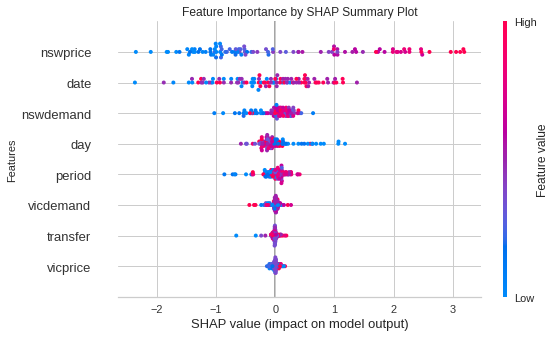

In [69]:
from matplotlib import pyplot as plt

shap_interaction_values = explainer.shap_interaction_values(x_test_selection)
shap.summary_plot(shap_values, x_test_selection, feature_names= df_x.columns,
                 show=False)
plt.title("Feature Importance by SHAP Summary Plot")
plt.ylabel("Features")
plt.savefig("shap_values_summary_plot.png") 
plt.show()

Sumário com os atributos mais importantes:

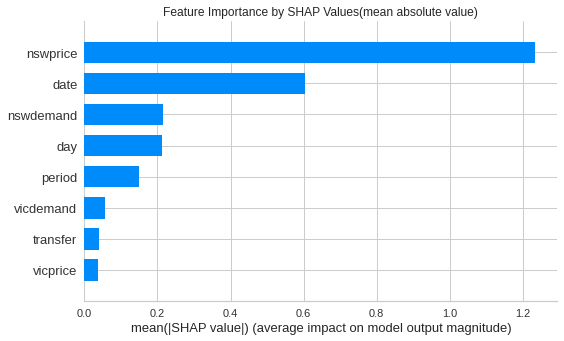

In [70]:


# Plot SHAP summary plot with bar type
shap.summary_plot(shap_values, x_test, feature_names= df_x.columns,
                  plot_type="bar", show= False )
plt.title("Feature Importance by SHAP Values(mean absolute value)")
plt.show()



## Conclusão
O atributo nswprice é o mais importante para determinar a classe, como pode ser observado no plot do sumário.
Observando o plot que mostra a contribuição de cada atributo em cada previsão pode-se observar que:
* O atributo nswprice tem um relação linear com a classe ou seja, quanto maior o atributo nswprice mais provavel da classe ser predita como 1.
* Para alguns casos o atributo day tem um relação linear inversa com a classe ou seja, em alguns casos, quanto menor o atributo day mais provavel da classe ser predita como 1.



# Verificar como um modelo lida com a evolução temporal da base de dados
O modelo a ser criado vai ser um classificador do tipo *Extreme Gradient Boosting* 
treinado com os parâmetros encontrados nos passos anteriores.

Utiliza os dados mais antigos na base para o treinamento do modelo

In [7]:
n_elements_to_use_in_train=10000
df=df.sort_values(by=['date'])
df_x=df.drop(['target'], axis = 1)
df_x['day']=df_x['day'].apply(lambda x: float(x))
y=df['target']
df_train=df_x.iloc[0:n_elements_to_use_in_train]
y_train=y.iloc[0:n_elements_to_use_in_train]
clf_params={'grow_policy': 'depthwise',
 'learning_rate': 0.01,
 'max_depth': 4,
 'max_leaves': 32,
 'n_estimators': 200}

Cria o modelo:

In [8]:
from xgboost import XGBClassifier
xgb = XGBClassifier(grow_policy=clf_params['grow_policy'], 
                    learning_rate=clf_params['learning_rate'],
                    max_depth=clf_params['max_leaves'],
                    max_leaves=clf_params['max_leaves'],
                    n_estimators=clf_params['n_estimators']
                   )
xgb.fit(df_train.values,y_train.values)

[19:48:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=32, max_leaves=32, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, ...)

Divide o conjuto de teste em blocos de 100 linhas e extrai estatísticas de acurácia e F1 para cada um dos blocos:

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

results={'i':[],'f1':[],'accuracy':[]}
for i in range(len(df_train),len(df),50):
    df_x_test=df_x.iloc[i:(i+50)]
    y_test=y.iloc[i:(i+50)]
    target_prediction_proba=xgb.predict_proba(df_x_test.values)
    y_predict=xgb.predict(df_x_test.values)
    f1=f1_score(y_test, y_predict)
    accuracy=accuracy_score(y_test, y_predict)
    results['i'].append(i)
    results['f1'].append(f1)
    results['accuracy'].append(accuracy)

df_results=pd.DataFrame.from_dict(results)

Evolução temporal da acurácia e do F1 ao longo do tempo:

<AxesSubplot:xlabel='i', ylabel='accuracy'>

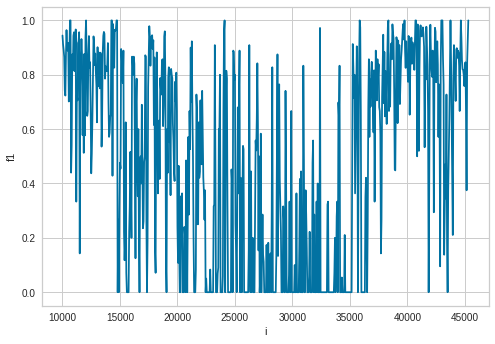

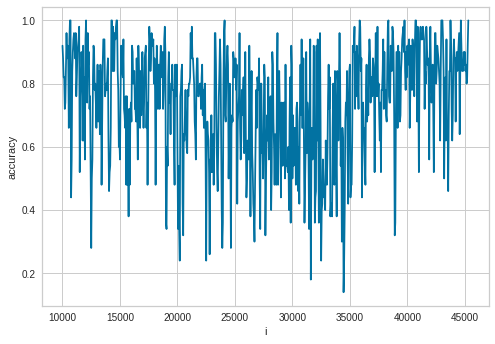

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt
df_results_to_use_in_sns=df_results.melt(id_vars=['i'], value_vars=['f1', 'accuracy'])
plt.figure(0)
sns.lineplot('i', 'f1', data=df_results)
plt.figure(1)
sns.lineplot('i', 'accuracy', data=df_results)
##sns.lineplot('i', 'value', data=df_results_to_use_in_sns,hue='variable')

In [20]:
df_results['accuracy'].mean()

0.7381895332390381

In [21]:
df_results['f1'].mean()

0.4881691582682646

## Conclusão
Os modelos treinados possuem uma qualidade de predição instável para dados que estão muito distantes no tempo daqueles com os quais o modelo foi treinado. É necessario se definir uma janela de treinamento e outra janela de predição deste modo, a cada N passos no tempo o modelo é retreinado com dados que não podem ser mais velhos que M passos.

# Analisar o tamanho das janelas de treinamento e teste para os modelos

Preparar base de dados:

In [4]:

df=df.sort_values(by=['date'])
df_x=df.drop(['target'], axis = 1)
df_x['day']=df_x['day'].apply(lambda x: float(x))
y=df['target']



Definição das funções que fazem os modelos e as previsões em deslocamentos de janelas de tempo:

In [3]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import tqdm
import pandas as pd
import numpy as np
clf_params={'grow_policy': 'depthwise',
 'learning_rate': 0.01,
 'max_depth': 4,
 'max_leaves': 32,
 'n_estimators': 200}

def create_model(clf_params,X,Y):
    xgb = XGBClassifier(grow_policy=clf_params['grow_policy'], 
                    learning_rate=clf_params['learning_rate'],
                    max_depth=clf_params['max_leaves'],
                    max_leaves=clf_params['max_leaves'],
                    n_estimators=clf_params['n_estimators']
                   )
    xgb.fit(X,Y)
    return xgb

def test_model(model, X,Y0,cutoff=None):
    Yproba=model.predict_proba(X)    
    if(cutoff==None):
        Y1=model.predict(X)
    else:
        Y1=np.array(Yproba[:,1]>cutoff,dtype=int)
        
    f1=f1_score(Y0, Y1)
    accuracy=accuracy_score(Y0, Y1)
    auc=roc_auc_score(Y0, Yproba[:, 1])
    
    return {'auc':auc,'f1':f1,'accuracy':accuracy}
    
def create_and_test_models_along_time(clf_params,df_x,y,data_size_to_train, data_size_to_test,cutoff=None):
    df_metricts_stored_as_dict={'auc':[],'f1':[],'accuracy':[],'i':[]}
    for i in tqdm.tqdm(range(data_size_to_train,len(df_x),data_size_to_test)):
        df_train=df_x.iloc[i-data_size_to_train:i].values
        y_train=y.iloc[i-data_size_to_train:i].values
        df_test=df_x.iloc[i:i+data_size_to_test].values
        y_test=y.iloc[i:i+data_size_to_test].values
        model=create_model(clf_params,df_train,y_train)
        ret=test_model(model, df_test,y_test,cutoff)
        df_metricts_stored_as_dict['auc'].append(ret['auc'])
        df_metricts_stored_as_dict['f1'].append(ret['f1'])
        df_metricts_stored_as_dict['accuracy'].append(ret['accuracy'])        
        df_metricts_stored_as_dict['i'].append(i)
        
    return pd.DataFrame.from_dict(df_metricts_stored_as_dict)
    

Análise para a janela de tempo treinamneto igual a 1000 e de predição igual a 50.
Gráfico com a evolução as métricas F1,acurácia e AUC aplicadas sobre janelas as predições 
ao longo tempo:

100%|██████████| 887/887 [04:48<00:00,  3.07it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  F

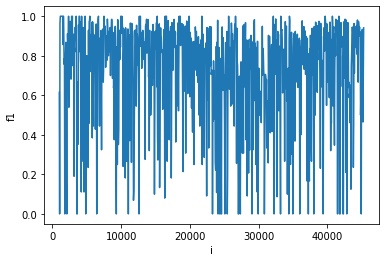

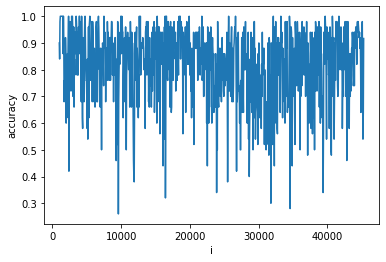

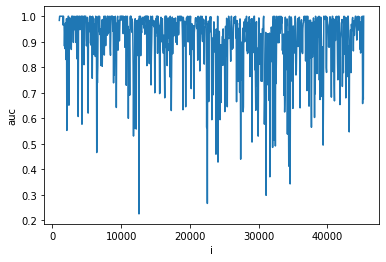

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
df_results=create_and_test_models_along_time(clf_params,df_x,y,1000, 50)
df_results_to_use_in_sns=df_results.melt(id_vars=['i'], value_vars=['f1', 'accuracy','auc'])
plt.figure(0)
sns.lineplot('i', 'f1', data=df_results)
plt.figure(1)
sns.lineplot('i', 'accuracy', data=df_results)
plt.figure(2)
sns.lineplot('i', 'auc', data=df_results)

Média para acurácia:

In [20]:
df_results['accuracy'].mean()

0.8175385193536265

Média para F1:

In [21]:
df_results['f1'].mean()

0.7162256347709653

Média para AUC

In [22]:
df_results['auc'].mean()

0.9050988299836241

Análise da qualidade dos modelos para diferentes o tamanhos das janelas de treinamento e teste:

In [5]:
window_trains=[500,1000,1400]
window_tests=[50,100]
df_metrics_in_windows_stored_as_dict={'acc_avg':[],'acc_std':[],
                                      'auc_avg':[],'auc_std':[],
                                      'f1_avg':[], 'f1_std':[],
                                      'window_train':[],'window_test':[] }
for window_train in window_trains:
    for window_test in window_tests:
        df_metrics=create_and_test_models_along_time(clf_params,df_x,y,window_train, window_test)
        acc_avg=df_metrics['accuracy'].mean()
        acc_std=df_metrics['accuracy'].std()
        auc_avg=df_metrics['auc'].mean()
        auc_std=df_metrics['auc'].std()
        f1_avg=df_metrics['f1'].mean()
        f1_std=df_metrics['f1'].std()
        df_metrics_in_windows_stored_as_dict['acc_avg'].append(acc_avg)
        df_metrics_in_windows_stored_as_dict['acc_std'].append(acc_std)
        df_metrics_in_windows_stored_as_dict['auc_avg'].append(auc_avg)
        df_metrics_in_windows_stored_as_dict['auc_std'].append(auc_std)
        df_metrics_in_windows_stored_as_dict['f1_avg'].append(f1_avg)
        df_metrics_in_windows_stored_as_dict['f1_std'].append(f1_std)
        df_metrics_in_windows_stored_as_dict['window_train'].append(window_train)
        df_metrics_in_windows_stored_as_dict['window_test'].append(window_test)
            

pd.DataFrame.from_dict(df_metrics_in_windows_stored_as_dict)
    

100%|██████████| 440/440 [03:37<00:00,  2.02it/s]


,acc_avg,acc_std,auc_avg,auc_std,f1_avg,f1_std,window_train,window_test
0,0.826752,0.131263,0.900498,0.117247,0.747325,0.228483,500,50
1,0.793489,0.128200,0.878679,0.112414,0.720844,0.200319,500,100
2,0.828429,0.133179,0.904367,0.114703,0.743870,0.234681,1000,50
3,0.799114,0.130662,0.881603,0.109866,0.723352,0.207571,1000,100
4,0.827027,0.128820,0.907401,0.108259,0.742640,0.229606,1400,50
5,0.796242,0.122902,0.885194,0.105978,0.718144,0.206213,1400,100


### Conclusão
Uma janela de treinamento com 1000 mil elementos e uma janela de predição de 50 elementos é a configuração ideal para criar modelos de predição do tipo *Extreme Gradient Boosting* (o tipo que apresentou melhores resultados nas análises anteriores) nesta base de dados.
